In [1]:
import numpy as np
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import glob
import time
import pandas as pd
from statistics import mean
import math

# plt.rcParams["figure.figsize"] = (3,3)
print (time.ctime())

Mon Jul 18 14:53:53 2022


In [259]:
# file1 ="E:/Data/AOD7142021/AOD_7142021_5.0V_100nsPW_6usDelay_PolRot50degW0028_H07-210714-151415-1.csv"
file1 ="E:/Google_Drive_Backup_E/Data/AOD782022/AOD_DE_160det_5thorder_2s_W0028_H07-220712-182133-1.csv"
print (file1, time.ctime())

data1 = pd.read_csv(file1) # %timeit 1min 9s ± 829 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
print(pd.read_csv(file1, nrows=5))
print(time.ctime())

E:/Data/AOD7142021/AOD_7142021_5.0V_100nsPW_6usDelay_PolRot50degW0028_H07-210714-151415-1.csv Thu Jul 22 16:17:48 2021
   #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  \
0      936  153509008426    72   251  153615384064         50              50   
1      936  153509008426    68   253  153615384320         75              75   
2      936  153509008426   167    97  153616047616         75              75   
3      936  153509008426    93   237  153616837632        100             100   
4      936  153509008426    90   243  153616840448         25              25   

   #Trig-ToA[arb]  Unnamed: 8  
0       106375638         NaN  
1       106375894         NaN  
2       107039190         NaN  
3       107829206         NaN  
4       107832022         NaN  
Thu Jul 22 16:18:19 2021


In [260]:
data1.shape
# , data2.shape

(34731853, 9)

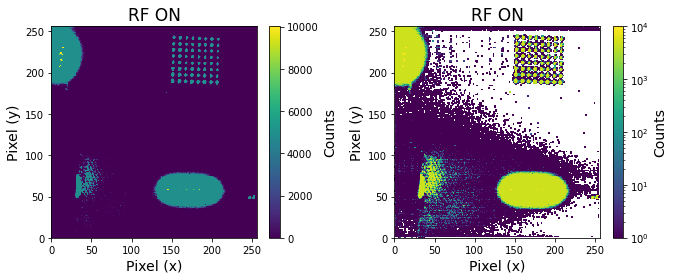

In [261]:
#File 1 grid
fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)])
cbar1 = fig.colorbar(h[3], ax = ax0)
cbar1.set_label('Counts', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)
ax0.set_title('RF ON', fontsize=17)

h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = 256, range = [(0, 256), (0, 256)], norm=mpl.colors.LogNorm())
cbar2 = fig.colorbar(h[3], ax = ax1)
cbar2.set_label('Counts', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)
ax1.set_title('RF ON', fontsize=17)

fig.tight_layout()
plt.show()

In [263]:
# # file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1_cent.csv"
# GridX1min = 150
# GridX1max = 212
# GridY1min = 41
# GridY1max = 103

# # file1 ="/QuantumRouter/AOD1012020/AOD_10s_blnkint_PL_1kHz_10ns_W0028_H07-201001-114131-1.csv"
# GridX2min = 118
# GridX2max = 161
# GridY2min = 108
# GridY2max = 151

# # file1 ="E:/Data/AOD332021/AOD_784nm7mW1.8V_100nsPW_8usdelay_10usGW_W0028_H07-210303-144232-1.csv"
# GridX1min = 55
# GridX1max = 125
# GridY1min = 130
# GridY1max = 200

# file1 ="E:/Data/AOD332021/AOD_784nm7mW1.8V_100nsPW_8usdelay_10usGW_W0028_H07-210303-144232-1.csv"
# GridX1min = 100
# GridX1max = 150
# GridY1min = 90
# GridY1max = 140

file1 ="/home/andrei/Data/TPX3/CHIP0/Test/AOD772021/AOD_772021_2.7V_100nsPW_6usDelay_2ndattempt_W0028_H07-210707-162811-1.csv"
GridX1min = 140
GridX1max = 246
GridY1min = 150
GridY1max = 256

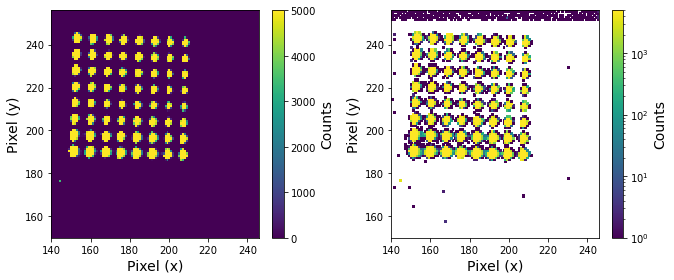

In [264]:
#File 1 grid

fig, (ax0, ax1) = plt.subplots(ncols=2, figsize=(9.5, 4))

h = ax0.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)])
cbar1 = fig.colorbar(h[3], ax = ax0)
cbar1.set_label('Counts', fontsize=14)
ax0.set_xlabel('Pixel (x)', fontsize=14)
ax0.set_ylabel('Pixel (y)', fontsize=14)


h = ax1.hist2d(data1['#Row'], data1['#Col'], bins = GridX1max-GridX1min, range = [(GridX1min, GridX1max), (GridY1min, GridY1max)], norm=mpl.colors.LogNorm())
cbar2 = fig.colorbar(h[3], ax = ax1)
cbar2.set_label('Counts', fontsize=14)
ax1.set_xlabel('Pixel (x)', fontsize=14)
ax1.set_ylabel('Pixel (y)', fontsize=14)


fig.tight_layout()
plt.show()
# fig.savefig('fullgrid_8212020_025044-1_cent.png')

In [270]:
def min_max(data, grid_x_min, grid_x_max, grid_y_min, grid_y_max):
    """Returns DataFrame filtering values less than min or greater than max for two columns"""
    x_cond = (data['#Row'] >grid_x_min) & (data['#Row'] < grid_x_max)
    y_cond = (data['#Col'] > grid_y_min) & (data['#Col'] < grid_y_max)
    new_data = data[x_cond & y_cond]
    return new_data



In [271]:
grid1_df = min_max(data1, GridX1min, GridX1max, GridY1min, GridY1max)

print(grid1_df.shape, type(grid1_df.iloc[0,0]), type(grid1_df.iloc[1,1]), time.ctime())
print(grid1_df.iloc[:3])

(4719274, 9) <class 'numpy.int64'> <class 'numpy.int64'> Thu Jul 22 16:19:04 2021
    #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  \
84      936  153509008426   209   160  153623035648         25   
90      936  153509008426   222   184  153623353344         50   
93      936  153509008426   200   183  153623355136         25   

    #ToTtotal[arb]  #Trig-ToA[arb]  Unnamed: 8  
84              25       114027222         NaN  
90              50       114344918         NaN  
93              25       114346710         NaN  


In [274]:
X_df = min_max(data1, 134, 240, 0, 106)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(X_df.shape, type(X_df.iloc[0,0]), type(X_df.iloc[1,1]), time.ctime())
print(X_df.iloc[:3])

(14736593, 9) <class 'numpy.int64'> <class 'numpy.int64'> Thu Jul 22 16:19:06 2021
   #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  #ToTtotal[arb]  \
3      936  153509008426    93   237  153616837632        100             100   
6      936  153509008426    31   194  153617466880         25              25   
7      936  153509008426    31   200  153617483776         25              25   

   #Trig-ToA[arb]  Unnamed: 8  
3       107829206         NaN  
6       108458454         NaN  
7       108475350         NaN  


In [275]:
Y_df = min_max(data1, 0, 106, 150, 256)
# Pt1_ToT_df = grid1_df.drop(grid1_df[(grid1_df['#ToT[arb]'] > tMin2) & (grid1_df['#ToT[arb]'] < tMax2)].index)

print(Y_df.shape, type(Y_df.iloc[0,0]), type(Y_df.iloc[1,1]), time.ctime())
print(Y_df.iloc[:3])

(11445805, 9) <class 'numpy.int64'> <class 'numpy.int64'> Thu Jul 22 16:19:07 2021
    #TrigId     #TrigTime  #Col  #Row          #ToA  #ToT[arb]  \
2       936  153509008426   167    97  153616047616         75   
25      936  153509008426   159    83  153619631616         25   
35      936  153509008426   159    66  153620916480        125   

    #ToTtotal[arb]  #Trig-ToA[arb]  Unnamed: 8  
2               75       107039190         NaN  
25              25       110623190         NaN  
35             125       111908054         NaN  


In [276]:
%store -r _0thToTsum

In [277]:
GRIDToTsum = np.nansum(grid1_df['#ToT[arb]'].to_numpy())
# _0thToTsum = np.nansum(oth_df['#ToT[arb]'].to_numpy())
YToTsum = np.nansum(Y_df['#ToT[arb]'].to_numpy())
XToTsum = np.nansum(X_df['#ToT[arb]'].to_numpy())
print("GRIDToTsum:", GRIDToTsum)
print("XToTsum:", XToTsum)
print("YToTsum:", YToTsum)
print("0thToTsum:", _0thToTsum)

GRIDToTsum: 2019169700
XToTsum: 16529413575
YToTsum: 16691446975
0thToTsum: 180990859075


In [278]:
print("Y/0th:", YToTsum/_0thToTsum)
print("X/0th:", XToTsum/_0thToTsum)
print("grid spots/non-grid spots:", GRIDToTsum/(_0thToTsum+YToTsum+XToTsum))
print("diffracted/0th:", (GRIDToTsum+YToTsum+XToTsum)/_0thToTsum)

Y/0th: 0.09222259654606814
X/0th: 0.09132733917877284
grid spots/non-grid spots: 0.009426046826638466
diffracted/0th: 0.19470613284064828


In [279]:
print("Diffraction efficiency: %.2f %%" % (((GRIDToTsum+YToTsum+XToTsum)/_0thToTsum)*100))

Diffraction efficiency: 19.47 %


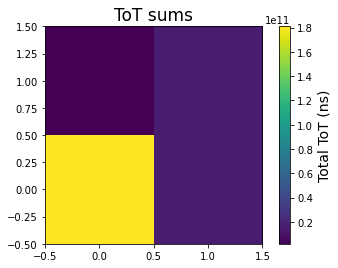

In [280]:
# reshape and plot data
# plt.figure(figsize = (8,8))
# TOTsums = [YToTsum, GRIDToTsum, _0thToTsum, XToTsum]
TOTsums = [_0thToTsum, XToTsum, GRIDToTsum, YToTsum]
plt.imshow(np.array(TOTsums).reshape(2,2), origin='lower')
plt.colorbar().set_label('Total ToT (ns)', fontsize=14)
plt.title('ToT sums', fontsize=17)
plt.show()